# Dense Communities in Networks
In this problem, we study the problem of finding dense communities in networks. Assume $G$ = ($V,E$) is an undirected graph (e.g., representing a social network).

- For any subset $S \subseteq V$ , we let the induced edge set (denoted by $E[S]$) to be the set of edges both of whose endpoints belong to $S$.
- For any $v \in S$, we let $deg_S(v) = |\{u \in S | (u,v) \in E\}|$.
- Then, we define the density of $S$ to be $$\rho(S)=\frac{|E[S]|}{|S|}$$
- Finally, the maximum density of the graph $G$ is the density of the densest induced subgraph of $G$, defined as $$\rho^\ast(G) = \max\limits_{S \subseteq V}\{\rho(S)\}$$

Our goal is to find an induced subgraph of $G$ whose density is not much smaller than $\rho^\ast(G)$. Such a set is very densely connected, and hence may indicate a community in the network represented by $G$. Also, since the graphs of interest are usually very large in practice, we would like the algorithm to be highly scalable. We consider the following algorithm:

```
Require: G=(V,E) and ε>0 
  S ̃,S ← V
  while S = ̸= ∅ do
    A(S) := {i ∈ S | deg_S(i) ≤ 2(1+ε)ρ(S)} 
    S ← S \ A(S)
    if ρ(S) > ρ(S ̃) then
      S ̃ ← S 
    end if
  end while 
  return S ̃
```

The basic idea in the algorithm is that the nodes with low degrees do not contribute much to the density of a dense subgraph, hence they can be removed without significantly influencing the density.

An undirected graph specified as a list of edges, is provided at 'livejournal-undirected.txt.zip.' The data set consists of 499923 vertices and 7794290 edges. Treat each line in the file as an undirected edge connecting the two given vertices. Implement the algorithm described above using a streaming model. For this problem, let the density of an empty set be 0. 

In [17]:
%pylab inline
import pylab

Populating the interactive namespace from numpy and matplotlib


In [1]:
def initialVertices(numNodes):    
    V = set();
    for i in range(numNodes):
        V.add(i);
    return V;

In [2]:
def initializeDeg(deg, S):
    for s in S:
        deg[s] = 0;

In [3]:
def computeDegree(S, edgesfile):
    fedges = open(edgesfile, 'r');
    deg = {};
    initializeDeg(deg, S)
    for line in fedges:
        split = map(int, line.split())
        if split[0] in S and split[1] in S:        
            deg[split[0]] += 1;
            deg[split[1]] += 1;
    return deg;

In [4]:
def computeDensitySet(S, edgesfile):
    fedges = open(edgesfile, 'r');
    num = 0;    
    for line in fedges:
        split = map(int, line.split())
        if split[0] in S and split[1] in S:
            num += 1;
    return float(num) / len(S)

In [5]:
def computeASet(S, deg, maxDens):
    A = set();
    for s in S:
        if deg[s] <= maxDens:
            A.add(s);
    return A;

In [6]:
def findDenseCommunity(V, edgesfile, eps):
    tS = V;
    densTS = computeDensitySet(tS, edgesfile);
    S = V;
    densS = densTS;
    numIter = 0;
    while len(S) > 0:
        numIter += 1;
        maxDens = 2 * (1 + eps) * densS;
        deg = computeDegree(S, edgesfile); 
        A = computeASet(S, deg, maxDens);
        S = S - A;
        if len(S) == 0:        
            break;
        densS = computeDensitySet(S, edgesfile);
        if densS > densTS:
            tS = S;
            densTS = densS;
    return tS, numIter;

In [7]:
def writeMapToFile(values, filename):
    f = open(filename, 'w');
    for k in values.keys():
        f.write(k);
        f.write(' ');
        f.write(str(values[k]));
        f.write('\n');

In [8]:
def writeVectorToFile(vec, filename):
    f = open(filename, 'w');
    for i in range(len(vec)):
        f.write(str(i));
        f.write(' ');
        f.write(str(vec[i]));
        f.write('\n');

In [9]:
def countEdges(edgesfile, S):
    fedges = open(edgesfile, 'r');
    res = 0;
    for line in fedges:
        split = map(int, line.split())
        if split[0] in S and split[1] in S:
            res += 1;
    return res;

In [10]:
def findDenseCommunityModified(V, edgesfile, eps):
    tS = V;
    densTS = computeDensitySet(tS, edgesfile);
    S = V;
    densS = densTS;
    numIter = 0;
    sizeS = [];
    eVec = [];
    rhoVec = [];
    while len(S) > 0:
        rhoVec.append(densS);
        sizeS.append(len(S));
        eVec.append(countEdges(edgesfile, S));
        numIter += 1;
        maxDens = 2 * (1 + eps) * densS;
        deg = computeDegree(S, edgesfile); 
        A = computeASet(S, deg, maxDens);
        S = S - A;
        if len(S) == 0:        
            break;
        densS = computeDensitySet(S, edgesfile);
        if densS > densTS:
            tS = S;
            densTS = densS;
    return tS, numIter, rhoVec, eVec, sizeS;

In [11]:
edgesfile = 'livejournal-undirected.txt';
numNodes = 499923;
numEdges = 7794290;
V = initialVertices(numNodes);

## Part 1
The number of iterations needed to find a dense subgraph depends upon the value of $\epsilon$. Show how many iterations it takes to calculate the first dense subgraph when $\epsilon$ = {0.1, 0.5, 1, 2} 

In [12]:
epsVec = [0.1, 0.5, 1, 2];
iterVec = {}
for i in range(len(epsVec)):
    tS, numIter = findDenseCommunity(V, edgesfile, epsVec[i]);
    iterVec[epsVec[i]] = numIter;
print(iterVec)

{0.5: 5, 1: 4, 2: 3, 0.1: 7}


## Part 2
When $\epsilon$ = 0.05, plot separate graphs showing $\rho(S_i)$, |$E(S_i)$| and |$S_i$| as a function of $i$ where $i$ is the iteration of the while loop.

In [13]:
eps = 0.05;
tS, numIter, rhoVec, eVec, sizeS = findDenseCommunityModified(V, edgesfile, eps);
writeVectorToFile(rhoVec, 'rhoVecii');
writeVectorToFile(eVec, 'eVecii');
writeVectorToFile(sizeS, 'sizeSii');
print(numIter);

8


### Single Iteration Plots

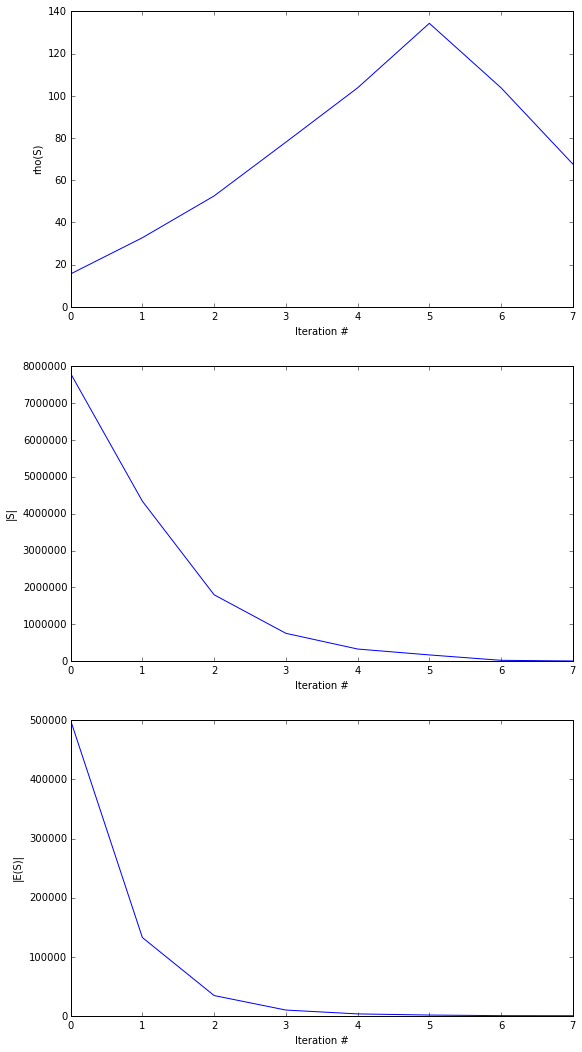

In [45]:
rhoVii = pylab.loadtxt('rhoVecii')
eVii = pylab.loadtxt('eVecii')
sizSii = pylab.loadtxt('sizeSii')

f2 = pylab.figure(figsize=(9,18))
p1 = f2.add_subplot(311)
p1.plot(rhoVii[:,0], rhoVii[:,1])
p1.set_xlabel("Iteration #")
p1.set_ylabel("rho(S)")

p2 = f2.add_subplot(312)
p2.plot(eVii[:,0], eVii[:,1])
p2.set_xlabel("Iteration #")
p2.set_ylabel("|S|")

p3 = f2.add_subplot(313)
p3.plot(sizSii[:,0], sizSii[:,1])
p3.set_xlabel("Iteration #")
p3.set_ylabel("|E(S)|")

## Part 3
The algorithm above only describes how to find one dense component (or community). It is also possible to find multiple components by running the above algorithm to find the first dense component and then deleting all vertices (and edges) belonging to that component. To find the next dense component, run the same algorithm on the modified graph. Plot separate graphs showing $\rho(\tilde{S_j})$, |$E[\tilde{S_j}]$| and |$\tilde{S_j}$| as a function of $j$ where $j$ is the current community that has been found. You can stop if 20 communities have already been found. Have $\epsilon$ = 0.05.

**Note:** the simulation can take over an hour because you have to run the algorithm to find communities 20 times.

In [14]:
eps = 0.05;
numCommunities = 20;

In [15]:
def findSeveralDenseCommunities(V, edgesfile, eps, numCommunities):
    rhoVec = [];
    sizeTS = [];
    eVec = [];
    for i in range(numCommunities):
        print(str(i));
        tS, numIter = findDenseCommunity(V, edgesfile, eps);
        sizeTS.append(len(tS));
        eVec.append(countEdges(edgesfile, tS));
        rhoVec.append(computeDensitySet(tS, edgesfile));
        V = V - tS;
    return rhoVec, eVec, sizeTS;

In [16]:
rhoVec, eVec, sizeTS = findSeveralDenseCommunities(V, edgesfile, eps, numCommunities);
writeVectorToFile(rhoVec, 'rhoVeciii');
writeVectorToFile(eVec, 'eVeciii');
writeVectorToFile(sizeTS, 'sizeTSiii');

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


### Community Plots

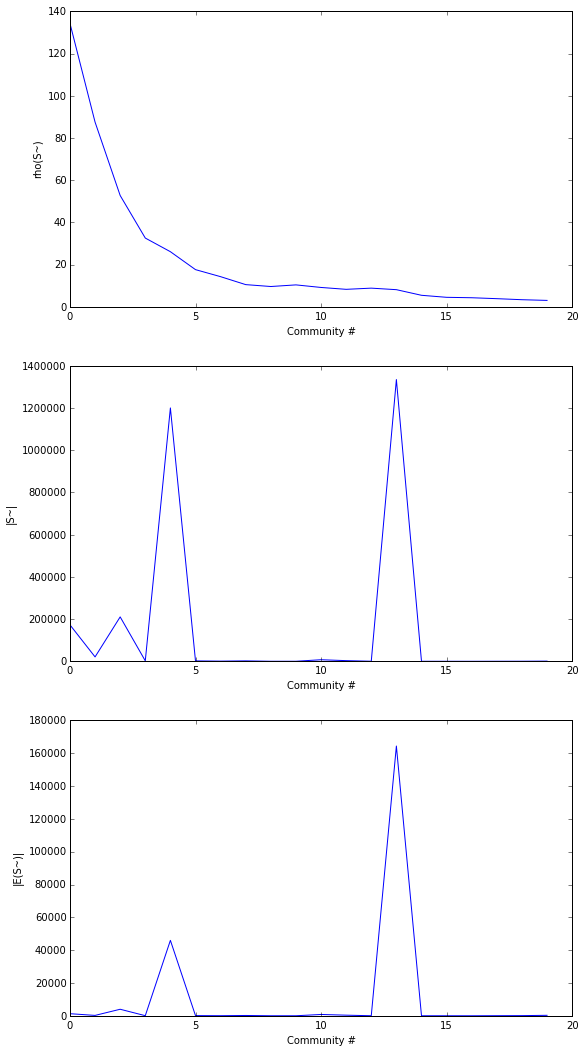

In [46]:
rhoViii = pylab.loadtxt('rhoVeciii')
eViii = pylab.loadtxt('eVeciii')
sTSii = pylab.loadtxt('sizeTSiii')

f3 = pylab.figure(figsize=(9,18))
p1 = f3.add_subplot(311)
p1.plot(rhoViii[:,0], rhoViii[:,1])
p1.set_xlabel("Community #")
p1.set_ylabel("rho(S~)")

p2 = f3.add_subplot(312)
p2.plot(eViii[:,0], eViii[:,1])
p2.set_xlabel("Community #")
p2.set_ylabel("|S~|")

p3 = f3.add_subplot(313)
p3.plot(sTSii[:,0], sTSii[:,1])
p3.set_xlabel("Community #")
p3.set_ylabel("|E(S~)|")